In [15]:
## olympics_dataset.csv 

In [16]:
## First, Import the library needed

import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 

In [53]:
## Read the file
df = pd.read_csv('olympics_dataset.csv')

## Look at information of each row (Check for NA and datatype)
df.info()

## Set the col 'player_id' as index and fix it
df.set_index('player_id', inplace= True)

## Condense the information
df['Sport_Event']= df['Sport'] + ' - '+  df['Event']

## Check for duplication for display and drop it
duplicates = df.duplicated()
df.drop_duplicates(keep='first', inplace=True)

## Spoted for some team there is -1 or -2, thus removing it with loop and assinging column update
check = list((df['Team']))
col_change =[]
for x in range(len(check)):
    try:
        int((check[x][-1]))
        if  check[x][-2]=='-':
            col_change.append(check[x]- '-' -check[x][-1])
        else:
            col_change.append(check[x])
    except:
        col_change.append(check[x])
df['Team']=col_change

## Just in case need duplication
df.drop_duplicates(keep='first', inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


[15120, 14891, 13818, 13772, 13688, 13600, 13440, 12972, 12919, 12035, 10300, 9454, 8640, 8585, 8267, 8116, 7702, 7191, 6302, 6251, 5127, 5109, 4656, 4290, 4028, 3062, 2465, 1896, 1726, 1297, 380]
[1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1996 2000 2004 2008 2012
 2016 2020 2024]
[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<BarContainer object of 30 artists>

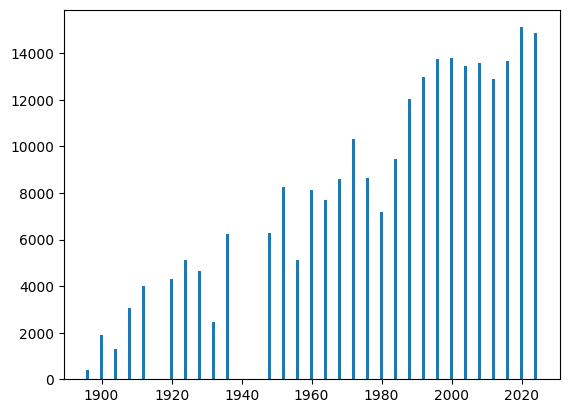

In [57]:
## How many in each year? Display by counts
print(list(df['Year'].value_counts()))

## Unique year and sort 
print(np.sort(df.Year.unique()))


## Assumption: Once in 4 year, so should be all devisible by 4 (I done this step after visualizing and find a gap, turns out to be 1906 and a gap in between 1936 to 1948)
print(np.sort(df.Year.unique())%4)
## 2 present in the remainder of divission, so remove it and update df, IDK why 1906, thus removing it
df = df[df['Year'] != 1906]

# Bar chart for visualization
plt.bar(df['Year'].value_counts().sort_index().index,df['Year'].value_counts().sort_index())



In [43]:
# Others are not that special, just make a function for them

def makebar(df,col):
    print(df[str(col)].value_counts())
    df.sort_values(by=col, ascending=False)
    # Bar chart for visualization
    plt.bar(df[str(col)].value_counts().sort_index().index,df[str(col)].value_counts().sort_index()) 
    ## Not bothering how it looks, just want to briefly look at it
    plt.title(f'Bar chart of {col}')
    plt.show()
    

Sex
M    175513
F     73860
Name: count, dtype: int64


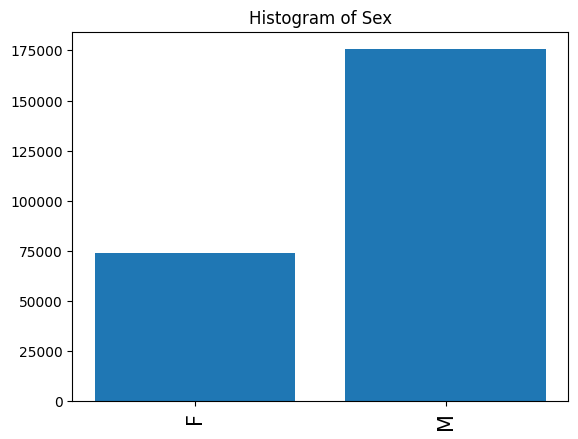

Team
United States       15902
Great Britain       11145
France              11040
Italy                9089
Germany              8369
                    ...  
Souvenance              1
Baby-9                  1
Demi-Mondaine-17        1
Demi-Mondaine-15        1
Relampago               1
Name: count, Length: 1165, dtype: int64


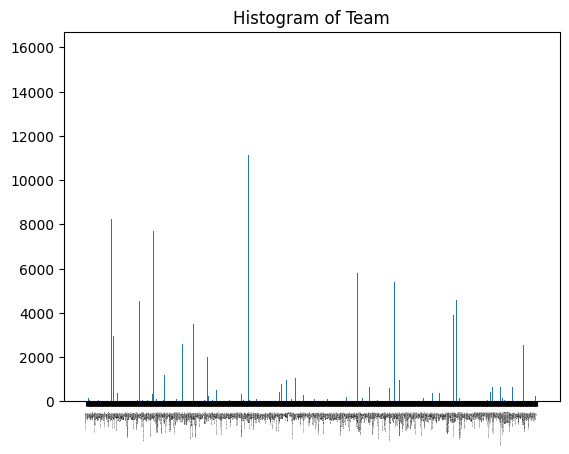

City
Tokyo             22822
London            22283
Paris             21896
Athina            13820
Sydney            13818
Atlanta           13772
Rio de Janeiro    13688
Beijing           13600
Barcelona         12972
Seoul             12035
Los Angeles       11919
Munich            10300
Montreal           8640
Mexico City        8585
Helsinki           8267
Roma               8116
Moskva             7191
Berlin             6251
Melbourne          4829
Amsterdam          4656
Stockholm          4326
Antwerpen          4290
St. Louis          1297
Name: count, dtype: int64


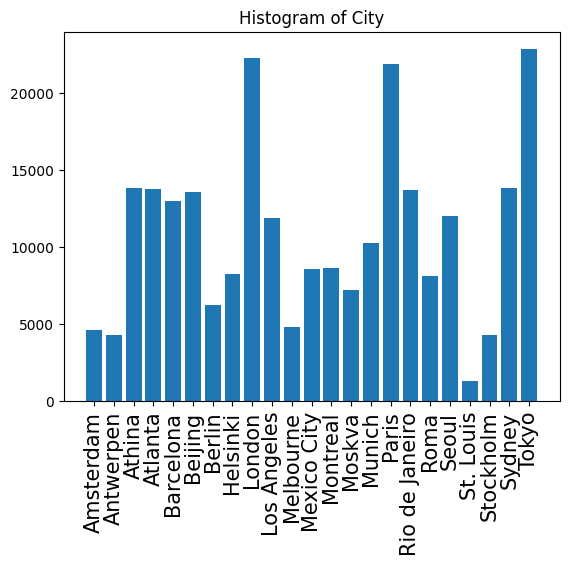

Medal
No medal    211049
Bronze       12917
Gold         12836
Silver       12571
Name: count, dtype: int64


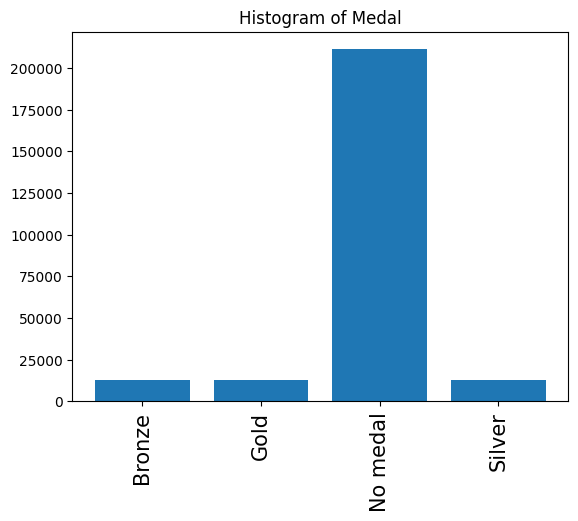

Sport_Event
Football - Football Men's Football                       5681
Hockey - Hockey Men's Hockey                             3950
Water Polo - Water Polo Men's Water Polo                 3358
Basketball - Basketball Men's Basketball                 3280
Cycling - Cycling Men's Road Race, Individual            2922
                                                         ... 
Cycling Road, Cycling Mountain Bike - Men's Road Race       1
Marathon Swimming, Swimming - Women's 400m Freestyle        1
Cycling Road, Cycling Track - Women's Keirin                1
Cycling Road, Cycling Track - Women's Sprint                1
Aeronautics - Aeronautics Mixed Aeronautics                 1
Name: count, Length: 1112, dtype: int64


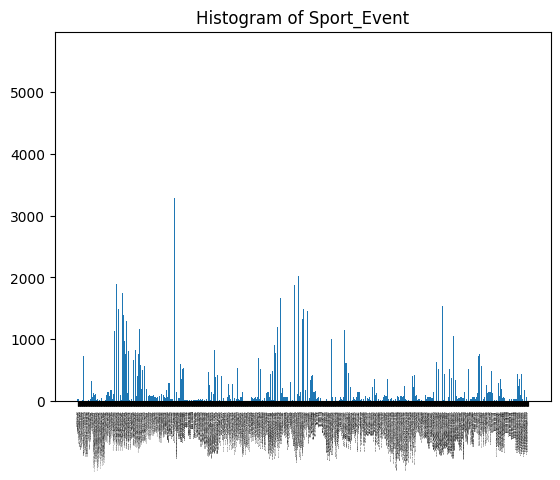

In [44]:
## Initiate a loop for the function
x = list(df.columns)
x = [col for col in x if col not in ['Name', 'Year']]

import time

for x in x:
    makebar(df,x)
    time.sleep(1)
    pass

In [22]:
## Sort the few columns with the column that does not show 'No medal' for winner by getting the value counts
winner = pd.DataFrame(df[['Sport_Event', 'Medal','Team','Year']][df['Medal'] != 'No medal'].value_counts())
## DO this to get back the columns, they are in index after sorting
winner_df = pd.DataFrame(winner).reset_index()
## Transform into pivot table, with index being 'Team' and 'Year', and column being 'Medal', this get the count of gold, silveer and bronze
pivot_table = winner_df.pivot_table(index=['Team', 'Year'], columns=['Medal'], aggfunc='sum', values='count',fill_value=0)
pivot_table.to_excel('Olympic_pivot.xlsx')

In [23]:
## Other extraction also can be done with different parameter
Person_Most_medal = pd.DataFrame(df[['Name', 'Team']][df['Medal'] != 'No medal'].value_counts())
Most_Gold_medal = pd.DataFrame(df[['Name', 'Medal','Team']][df['Medal'] == 'Gold'].value_counts())
Most_Silver_medal = pd.DataFrame(df[['Name', 'Medal','Team']][df['Medal'] == 'Silver'].value_counts())
Most_medal_team = pd.DataFrame(df[['Team', 'Year']][df['Medal'] != 'No medal'].value_counts())

## Also to get most medal team, >3 for visualization in Power BI
Most_medal_team = Most_medal_team[Most_medal_team['count']>=3].reset_index()
Most_medal_team.to_excel('Olympic_NonPivot_most_win_country.xlsx')

## Export into pivot for excel visualization
Most_medal_team = pd.pivot_table(Most_medal_team, values='count', index=['Team', 'Year'], aggfunc='sum')
Most_medal_team.to_excel('Olympic_pivot_most_win_country.xlsx')


In [55]:
## This can be done to get team == US
mydf = df[df['Team']== 'United States']
mydf.loc[mydf['Medal'] != 'No medal', ['Name', 'Year','Medal','Sport_Event']].sort_values('Year')

,Name,Year,Medal,Sport_Event
player_id,,,,
180286,Sumner Paine,1896,Gold,"Shooting - Shooting Men's Free Pistol, 30 metres"
180287,Sumner Paine,1896,Silver,"Shooting - Shooting Men's Military Pistol, 25 ..."
99598,William Hoyt,1896,Gold,Athletics - Athletics Men's Pole Vault
245506,Albert Tyler,1896,Silver,Athletics - Athletics Men's Pole Vault
44062,James Connolly,1896,Silver,Athletics - Athletics Men's High Jump
...,...,...,...,...
1935984,Regan Smith,2024,Silver,Swimming - Women's 200m Butterfly
1935984,Regan Smith,2024,Silver,Swimming - Women's 200m Backstroke
1935984,Regan Smith,2024,Silver,Swimming - Women's 100m Backstroke


In [29]:
## Example of showing most medal winner
df[['Name']][df['Medal'] != 'No medal'].value_counts().head(25)


Name                  
Michael Ii                28
Larysa (diriy-)           18
Nikolay Andrianov         15
Charles Jr.               15
John Jr.                  13
Edoardo Mangiarotti       13
Borys Shakhlin            13
Takashi Ono               13
Dara -minas)              12
Ryan Lochte               12
Aleksey Nemov             12
Birgit Fischer-schmidt    12
Paavo Nurmi               12
Natalie (-hall)           12
Sawao Kato                12
Jennifer (-cumpelik)      12
William Jr.               11
Viktor Chukarin           11
Carl Osburn               11
Allyson Felix             11
Vra (-odloilov)           11
Simone Biles              11
Mark Spitz                11
Matthew Biondi            11
Polina Astakhova          10
Name: count, dtype: int64